In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

In [24]:
DATA_PATH = '/Users/euanprentis/Documents/feat_predict_simulations/data'
RESULTS_PATH = '/Users/euanprentis/Documents/feat_predict_simulations/results'
MODELS = ['ss', 'ss-sampler', 'ff']
COMPARISON_PARAMETERS = [
    'alpha',
    'beta',
    'beta_test',
    'segmentation',
    'sampler_feature_weight',
    'sampler_specificity'
]

# Model colors
MODEL_COLORS = {
    'ss': '#9cd8ff',
    'ss-sampler': '#3DB2FF',
    'ff': '#FF2442'
}

# Functions

In [107]:
def set_axis_ratio(ax, ratio=1):
    """
    Make axis aspect ratio square
    
    Arguments
    ---------
    ax : matplotlib.Axes
        matplotlib axis to transform
    ratio : int or float
        ratio of y- to x-axis
        
    Returns
    -------
    None
    """
    ax.set_aspect(ratio/ax.get_data_ratio(), adjustable='box')

def sigmoid(x):
    """
    Sigmoid function

    Arguments
    ---------
    x : int or float
        input value

    Returns
    -------
    float
        sigmoid of x
    """
    return 1 / (1 + np.exp(-x))

def round_up(x, n):
    """
    Round up to n decimal places

    Arguments
    ---------
    x : int or float
        input value
    n : int
        number of decimal places
    
    Returns
    -------
    float
        x rounded up to n decimal
    """
    factor = 10**n
    return np.ceil(x*factor)/factor


def plot_parameter_relationship(
    df,
    x,
    y,
    x_label = None,
    y_label = None,
    color = None
):
    """
    Plot relationship between two parameters

    Arguments
    ---------
    df : pandas.DataFrame
        data frame containing parameters
    x : str
        column name for x-axis
    y : str
        column name for y-axis
    x_label : str
        label for x-axis
    y_label : str
        label for y-axis
    color : str
        color for plot
    
    Returns
    -------
    None
    """

    # Init JointGrid
    g = sns.JointGrid(data=df, x=x, y=y, height=3)

    # Plot Logistic
    sns.regplot(
        data = df,
        x = x,
        y = y,
        logistic = True,
        color = color,
        scatter_kws = {'edgecolor': 'white'},
        line_kws = {'color': 'black'},
        ax = g.ax_joint,
    )

    # Plot histograms on the marginal axes
    g.plot_marginals(
        sns.histplot,
        color = color
    )
    g.set_axis_labels(x_label, y_label)

    # Print Pearson's and Spearman's correlations
    pear_val, pear_p = pearsonr(df[x], df[y])
    spear_val, spear_p = spearmanr(df[x], df[y])
    print(f"""
    {x} vs {y}
    Pearson's correlation: {np.round(pear_val, 2)} (p <= {round_up(pear_p, 4)})
    Spearman's correlation: {np.round(spear_val, 2)} (p <= {round_up(spear_p, 4)})
    """)


# Load Data
## Load Simulated Parameters

In [26]:
# Load simulated agent parameters
sim_params = []
for model in MODELS:
    for f in listdir(f'{DATA_PATH}/{model}/training'):
        agent_data = pd.read_csv(f'{DATA_PATH}/{model}/training/{f}')
        sim_params.append(agent_data[[
            'id',
            'model_label',
            *COMPARISON_PARAMETERS
        ]].values[0])

# Combine into one data frame
sim_params = pd.DataFrame(
    sim_params,
    columns = ['id', 'model_label', *COMPARISON_PARAMETERS]
)
sim_params

,id,model_label,alpha,beta,beta_test,segmentation,sampler_feature_weight,sampler_specificity
0,161,ss,0.139830,26.309425,26.309425,1.000000,1.0,1.0
1,175,ss,0.515469,2.759290,2.759290,1.000000,1.0,1.0
2,149,ss,0.165642,3.720871,3.720871,1.000000,1.0,1.0
3,148,ss,0.091054,2.346891,2.346891,1.000000,1.0,1.0
4,174,ss,0.012506,1.084926,1.084926,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...
295,24,ff,0.109740,39.716787,39.716787,0.610988,1.0,1.0
296,32,ff,0.016597,1.770766,1.770766,0.195929,1.0,1.0
297,26,ff,0.456666,7.314857,7.314857,0.871580,1.0,1.0
298,27,ff,0.223642,1.248781,1.248781,0.144784,1.0,1.0


## Load Fitting Results

In [27]:
model_fits = []
for model in MODELS:
    this_model_fits = pd.read_csv(f'{RESULTS_PATH}/model_fits_{model}.csv')
    this_model_fits = this_model_fits[[
        'id',
        'model_label',
        'success',
        'nll', 
        'aic',
        'null_nll',
        *COMPARISON_PARAMETERS
    ]]
    model_fits.append(this_model_fits)
model_fits = pd.concat(model_fits)
model_fits = model_fits.reset_index(drop=True)
model_fits

,id,model_label,success,nll,aic,null_nll,alpha,beta,beta_test,segmentation,sampler_feature_weight,sampler_specificity
0,101,ff,True,288.201666,582.403332,299.439582,1.000000,0.048246,0.048246,0.897464,1.000000,1.000000
1,101,ss,True,182.924368,369.848735,299.439582,0.214567,28.013147,28.013147,1.000000,1.000000,1.000000
2,101,ss-sampler,True,289.080492,586.160984,299.439582,1.000000,0.123301,0.123301,1.000000,0.985940,131.409297
3,102,ff,True,299.068771,604.137542,299.439582,0.000209,8266.647102,8266.647102,0.995609,1.000000,1.000000
4,102,ss,True,296.939839,597.879679,299.439582,0.000284,711.942036,711.942036,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,99,ss,True,293.597590,591.195180,299.439582,0.990555,0.137056,0.137056,1.000000,1.000000,1.000000
896,99,ss-sampler,True,285.566450,579.132901,299.439582,1.000000,0.152127,0.152127,1.000000,0.670373,4.371384
897,100,ff,True,127.852941,261.705882,299.439582,1.000000,0.558205,0.558205,0.887551,1.000000,1.000000
898,100,ss,True,276.472759,556.945519,299.439582,1.000000,0.194053,0.194053,1.000000,1.000000,1.000000


## Combine into one data frame

In [28]:
# Marge simulated and fit parameters
model_fits = pd.merge(
    sim_params,
    model_fits,
    on = 'id',
    suffixes = ('_sim', '_fit')
)

# Transform betas to be bounded [0, 1]
for param in COMPARISON_PARAMETERS:
    if ('beta' in param) or (param == 'sampler_specificity'):
        model_fits[f'{param}_trans_sim'] = sigmoid(model_fits[f'{param}_sim'])
        model_fits[f'{param}_trans_fit'] = sigmoid(model_fits[f'{param}_fit'])

model_fits

,id,model_label_sim,alpha_sim,beta_sim,beta_test_sim,segmentation_sim,sampler_feature_weight_sim,sampler_specificity_sim,model_label_fit,success,...,beta_test_fit,segmentation_fit,sampler_feature_weight_fit,sampler_specificity_fit,beta_trans_sim,beta_trans_fit,beta_test_trans_sim,beta_test_trans_fit,sampler_specificity_trans_sim,sampler_specificity_trans_fit
0,161,ss,0.139830,26.309425,26.309425,1.000000,1.0,1.0,ff,True,...,0.113251,0.000000,1.000000,1.000000,1.000000,0.528282,1.000000,0.528282,0.731059,0.731059
1,161,ss,0.139830,26.309425,26.309425,1.000000,1.0,1.0,ss,True,...,11.010579,1.000000,1.000000,1.000000,1.000000,0.999983,1.000000,0.999983,0.731059,0.731059
2,161,ss,0.139830,26.309425,26.309425,1.000000,1.0,1.0,ss-sampler,True,...,0.173360,1.000000,0.653312,6.858853,1.000000,0.543232,1.000000,0.543232,0.731059,0.998951
3,175,ss,0.515469,2.759290,2.759290,1.000000,1.0,1.0,ff,True,...,0.049200,0.886391,1.000000,1.000000,0.940436,0.512298,0.940436,0.512298,0.731059,0.731059
4,175,ss,0.515469,2.759290,2.759290,1.000000,1.0,1.0,ss,True,...,1.960507,1.000000,1.000000,1.000000,0.940436,0.876588,0.940436,0.876588,0.731059,0.731059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,27,ff,0.223642,1.248781,1.248781,0.144784,1.0,1.0,ss,True,...,0.139338,1.000000,1.000000,1.000000,0.777089,0.534778,0.777089,0.534778,0.731059,0.731059
896,27,ff,0.223642,1.248781,1.248781,0.144784,1.0,1.0,ss-sampler,True,...,0.296102,1.000000,1.000000,1.000000,0.777089,0.573489,0.777089,0.573489,0.731059,0.731059
897,33,ff,0.068447,1.386010,1.386010,0.433797,1.0,1.0,ff,True,...,20.830574,0.094086,1.000000,1.000000,0.799955,1.000000,0.799955,1.000000,0.731059,0.731059
898,33,ff,0.068447,1.386010,1.386010,0.433797,1.0,1.0,ss,True,...,0.031140,1.000000,1.000000,1.000000,0.799955,0.507784,0.799955,0.507784,0.731059,0.731059


# Model Recovery

## Compute if the best fitting model matches the simulated model

In [7]:
model_comparison = model_fits[[
    'id',
    'model_label_sim',
    'model_label_fit',
    'aic'
]]

# Compute the minimum AIC for each agent
min_aic = model_comparison[['id', 'aic']].groupby('id').min()
min_aic = min_aic.reset_index()
model_comparison = pd.merge(
    model_comparison,
    min_aic,
    on = 'id',
    suffixes = ('', '_min')
)

# Identify the model with the lowest AIC
model_comparison['best_fit'] = (
    model_comparison['aic'] == model_comparison['aic_min']
).astype(int)

# Get best fitting models only
best_fits = model_comparison[model_comparison['best_fit'] == 1]
best_fits = best_fits.reset_index(drop=True) 

# Model is recovered if the best fit model matches the simulated model
best_fits['recovered'] = (
    (best_fits['model_label_sim'] == best_fits['model_label_fit']) &
    (best_fits['best_fit'] == 1)
).astype(int)

best_fits

,id,model_label_sim,model_label_fit,aic,aic_min,best_fit,recovered
0,161,ss,ss,416.078720,416.078720,1,1
1,175,ss,ss,431.849570,431.849570,1,1
2,149,ss,ss,509.448028,509.448028,1,1
3,148,ss,ss,579.597039,579.597039,1,1
4,174,ss,ss,601.370620,601.370620,1,1
...,...,...,...,...,...,...,...
295,24,ff,ff,135.180168,135.180168,1,1
296,32,ff,ss,601.770486,601.770486,1,0
297,26,ff,ff,131.170351,131.170351,1,1
298,27,ff,ff,453.547625,453.547625,1,1


## Plot model recovery rates

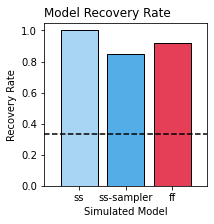

In [44]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(
    data = best_fits,
    x = 'model_label_sim',
    y = 'recovered',
    order = MODELS,
    ci = None,
    palette = MODEL_COLORS,
    edgecolor = 'black'
)
ax.axhline(1/len(MODELS), color='black', linestyle='--')
ax.set_xlabel('Simulated Model')
ax.set_ylabel('Recovery Rate')
ax.set_xlim(-0.75, 2.75)
ax.set_title('Model Recovery Rate', loc='left')
set_axis_ratio(ax)

## Fit rates for each model

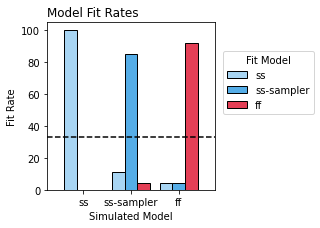

In [45]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.countplot(
    data = best_fits,
    x = 'model_label_sim',
    order = MODELS,
    hue = 'model_label_fit',
    hue_order = MODELS,
    palette = MODEL_COLORS,
    edgecolor = 'black'
)
ax.axhline((len(best_fits)/3)/len(MODELS), color='black', linestyle='--')
ax.legend(title='Fit Model', loc=(1.05, .45))
ax.set_xlabel('Simulated Model')
ax.set_ylabel('Fit Rate')
ax.set_xlim(-0.75, 2.75)
ax.set_title('Model Fit Rates', loc='left')
set_axis_ratio(ax)

## Fit rates for each model by aggregated AIC

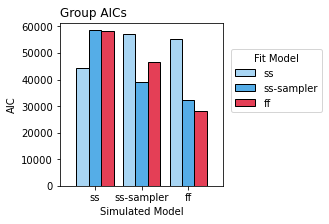

In [46]:
aic_comparison = model_comparison[['model_label_sim', 'model_label_fit', 'aic']]
aic_comparison = aic_comparison.groupby(['model_label_sim', 'model_label_fit'])
aic_comparison = aic_comparison.sum()
aic_comparison = aic_comparison.reset_index()

fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(
    data = aic_comparison,
    x = 'model_label_sim',
    y = 'aic',
    order = MODELS,
    hue = 'model_label_fit',
    hue_order = MODELS,
    palette = MODEL_COLORS,
    edgecolor = 'black'
)
ax.legend(title='Fit Model', loc=(1.05, .45))
ax.set_xlabel('Simulated Model')
ax.set_ylabel('AIC')
ax.set_xlim(-0.75, 2.75)
ax.set_title('Group AICs', loc='left')
set_axis_ratio(ax)

# Parameter Recovery

## Conjunctive Model

### Learning Rate Recovery


    alpha_sim vs alpha_fit
    Pearson's correlation: 0.74 (p <= 0.0001)
    Spearman's correlation: 0.76 (p <= 0.0001)
    

    alpha_fit vs beta_trans_fit
    Pearson's correlation: -0.38 (p <= 0.0002)
    Spearman's correlation: -0.45 (p <= 0.0001)
    


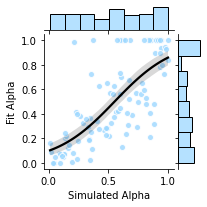

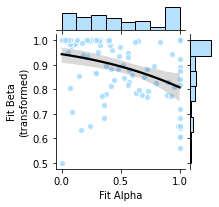

In [108]:
idx = (
    (model_fits['model_label_sim'] == 'ss') &
    (model_fits['model_label_fit'] == 'ss')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_sim',
    'alpha_fit',
    x_label = 'Simulated Alpha',
    y_label = 'Fit Alpha',
    color = MODEL_COLORS['ss']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'beta_trans_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ss']
)

### Inverse Temperature Recovery


    beta_trans_sim vs beta_trans_fit
    Pearson's correlation: 0.49 (p <= 0.0001)
    Spearman's correlation: 0.58 (p <= 0.0001)
    


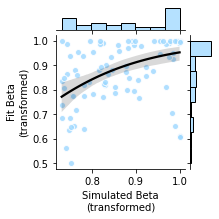

In [109]:
idx = (
    (model_fits['model_label_sim'] == 'ss') &
    (model_fits['model_label_fit'] == 'ss')
)
plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_sim',
    'beta_trans_fit',
    x_label = 'Simulated Beta\n(transformed)',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ss']
)

## Conjunctive Sampler Model

### Learning Rate Recovery


    alpha_sim vs alpha_fit
    Pearson's correlation: 0.49 (p <= 0.0001)
    Spearman's correlation: 0.51 (p <= 0.0001)
    

    alpha_fit vs beta_trans_fit
    Pearson's correlation: -0.57 (p <= 0.0001)
    Spearman's correlation: -0.66 (p <= 0.0001)
    

    alpha_fit vs sampler_feature_weight_fit
    Pearson's correlation: -0.09 (p <= 0.3951)
    Spearman's correlation: -0.07 (p <= 0.4901)
    

    alpha_fit vs sampler_specificity_trans_fit
    Pearson's correlation: -0.18 (p <= 0.0731)
    Spearman's correlation: -0.25 (p <= 0.0109)
    


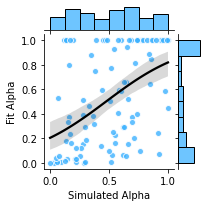

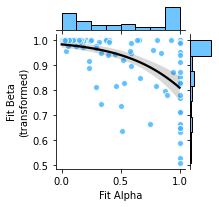

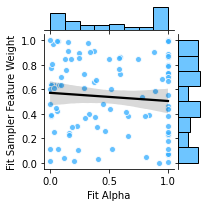

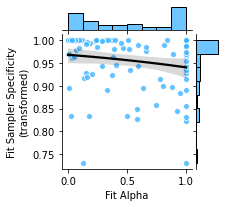

In [110]:
idx = (
    (model_fits['model_label_sim'] == 'ss-sampler') &
    (model_fits['model_label_fit'] == 'ss-sampler')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_sim',
    'alpha_fit',
    x_label = 'Simulated Alpha',
    y_label = 'Fit Alpha',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'beta_trans_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'sampler_feature_weight_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Sampler Feature Weight',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'sampler_specificity_trans_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Sampler Specificity\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

### Inverse Temperature Recovery


    beta_trans_sim vs beta_trans_fit
    Pearson's correlation: 0.35 (p <= 0.0005)
    Spearman's correlation: 0.36 (p <= 0.0003)
    

    beta_trans_fit vs sampler_feature_weight_fit
    Pearson's correlation: -0.0 (p <= 0.9631)
    Spearman's correlation: -0.01 (p <= 0.9516)
    

    beta_trans_fit vs sampler_specificity_trans_fit
    Pearson's correlation: 0.13 (p <= 0.186)
    Spearman's correlation: 0.21 (p <= 0.0326)
    


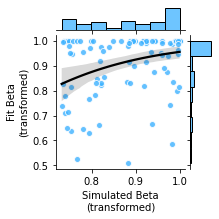

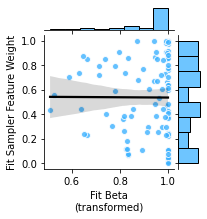

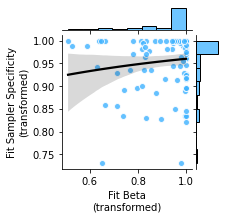

In [111]:
idx = (
    (model_fits['model_label_sim'] == 'ss-sampler') &
    (model_fits['model_label_fit'] == 'ss-sampler')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_sim',
    'beta_trans_fit',
    x_label = 'Simulated Beta\n(transformed)',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_fit',
    'sampler_feature_weight_fit',
    x_label = 'Fit Beta\n(transformed)',
    y_label = 'Fit Sampler Feature Weight',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_fit',
    'sampler_specificity_trans_fit',
    x_label = 'Fit Beta\n(transformed)',
    y_label = 'Fit Sampler Specificity\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

### Sampler Feature Weight


    sampler_feature_weight_sim vs sampler_feature_weight_fit
    Pearson's correlation: 0.89 (p <= 0.0001)
    Spearman's correlation: 0.89 (p <= 0.0001)
    

    sampler_feature_weight_fit vs sampler_specificity_trans_fit
    Pearson's correlation: -0.04 (p <= 0.7239)
    Spearman's correlation: 0.05 (p <= 0.5952)
    


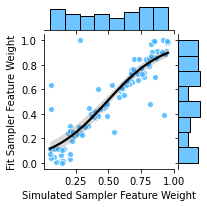

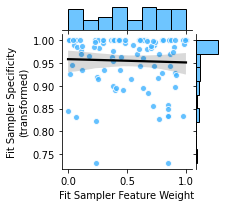

In [112]:
idx = (
    (model_fits['model_label_sim'] == 'ss-sampler') &
    (model_fits['model_label_fit'] == 'ss-sampler')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'sampler_feature_weight_sim',
    'sampler_feature_weight_fit',
    x_label = 'Simulated Sampler Feature Weight',
    y_label = 'Fit Sampler Feature Weight',
    color = MODEL_COLORS['ss-sampler']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'sampler_feature_weight_fit',
    'sampler_specificity_trans_fit',
    x_label = 'Fit Sampler Feature Weight',
    y_label = 'Fit Sampler Specificity\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

### Sampler Specificity


    sampler_specificity_trans_sim vs sampler_specificity_trans_fit
    Pearson's correlation: 0.66 (p <= 0.0001)
    Spearman's correlation: 0.76 (p <= 0.0001)
    


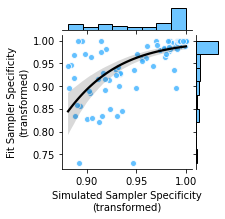

In [113]:
idx = (
    (model_fits['model_label_sim'] == 'ss-sampler') &
    (model_fits['model_label_fit'] == 'ss-sampler')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'sampler_specificity_trans_sim',
    'sampler_specificity_trans_fit',
    x_label = 'Simulated Sampler Specificity\n(transformed)',
    y_label = 'Fit Sampler Specificity\n(transformed)',
    color = MODEL_COLORS['ss-sampler']
)

## Feature-Based Model

### Learning Rate Recovery


    alpha_sim vs alpha_fit
    Pearson's correlation: 0.48 (p <= 0.0001)
    Spearman's correlation: 0.5 (p <= 0.0001)
    

    alpha_fit vs beta_trans_fit
    Pearson's correlation: -0.52 (p <= 0.0001)
    Spearman's correlation: -0.58 (p <= 0.0001)
    

    alpha_fit vs segmentation_fit
    Pearson's correlation: 0.06 (p <= 0.5524)
    Spearman's correlation: 0.03 (p <= 0.736)
    


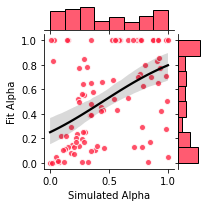

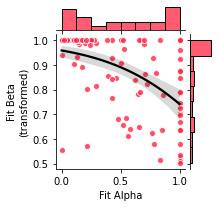

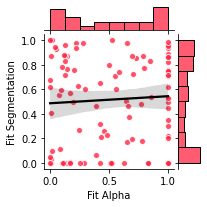

In [114]:
idx = (
    (model_fits['model_label_sim'] == 'ff') &
    (model_fits['model_label_fit'] == 'ff')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_sim',
    'alpha_fit',
    x_label = 'Simulated Alpha',
    y_label = 'Fit Alpha',
    color = MODEL_COLORS['ff']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'beta_trans_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ff']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'alpha_fit',
    'segmentation_fit',
    x_label = 'Fit Alpha',
    y_label = 'Fit Segmentation',
    color = MODEL_COLORS['ff']
)


### Inverse Temperature Recovery


    beta_trans_sim vs beta_trans_fit
    Pearson's correlation: 0.4 (p <= 0.0001)
    Spearman's correlation: 0.42 (p <= 0.0001)
    

    beta_trans_fit vs segmentation_fit
    Pearson's correlation: -0.15 (p <= 0.1325)
    Spearman's correlation: -0.07 (p <= 0.492)
    


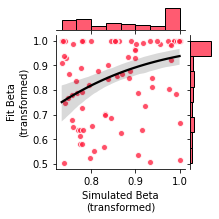

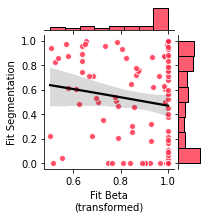

In [115]:
idx = (
    (model_fits['model_label_sim'] == 'ff') &
    (model_fits['model_label_fit'] == 'ff')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_sim',
    'beta_trans_fit',
    x_label = 'Simulated Beta\n(transformed)',
    y_label = 'Fit Beta\n(transformed)',
    color = MODEL_COLORS['ff']
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'beta_trans_fit',
    'segmentation_fit',
    x_label = 'Fit Beta\n(transformed)',
    y_label = 'Fit Segmentation',
    color = MODEL_COLORS['ff']
)

### Segmentation Recovery


    segmentation_sim vs segmentation_fit
    Pearson's correlation: 0.78 (p <= 0.0001)
    Spearman's correlation: 0.77 (p <= 0.0001)
    


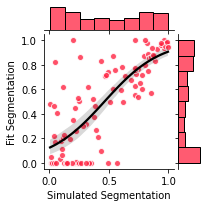

In [116]:
idx = (
    (model_fits['model_label_sim'] == 'ff') &
    (model_fits['model_label_fit'] == 'ff')
)

plot_parameter_relationship(
    model_fits.loc[idx],
    'segmentation_sim',
    'segmentation_fit',
    x_label = 'Simulated Segmentation',
    y_label = 'Fit Segmentation',
    color = MODEL_COLORS['ff']
)